__MODEL TRAINING__

Importing all the required packages 

In [7]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
!pip install catboost
!pip install xgboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


Importing the CSV Data as Pandas Dataframe 

In [8]:
df = pd.read_csv('C:/Users/kavit/OneDrive/Desktop/ml_projects/notebook/StudentsPerformance.csv')

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables 

In [10]:
X = df.drop(columns = ['math score'], axis = 1)

In [11]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
print("catergories in 'gender' variable : ", end = " ")
print(df['gender'].unique())
print('-----------------------------------------------------')
print("categories in 'race/ethinicity' variable : ", end = " ")
print(df['race/ethnicity'].unique())
print('-----------------------------------------------------')
print("categories in 'parental level of education' variable : ", end = " ")
print(df['parental level of education'].unique())
print('-----------------------------------------------------')
print("categories in 'lunch' variable : ", end = " ")
print(df['lunch'].unique())
print('-----------------------------------------------------')
print("categories in 'test preparation course' variable : ", end = " ")
print(df['test preparation course'].unique())

catergories in 'gender' variable :  ['female' 'male']
-----------------------------------------------------
categories in 'race/ethinicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
-----------------------------------------------------
categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-----------------------------------------------------
categories in 'lunch' variable :  ['standard' 'free/reduced']
-----------------------------------------------------
categories in 'test preparation course' variable :  ['none' 'completed']


In [ ]:
y = df['math score'] # column to be predicted 

In [14]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
# Creating Column Transformer with 2 types of tranformers
num_features = X.select_dtypes(exclude = "object").columns # Columns with numerical data
cat_features = X.select_dtypes(include = "object").columns # Columns with category data

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler() # Standardizing the numerical data to have mean 0 and std dev 1
oh_transformer = OneHotEncoder() # Standardizing categorical data to 0s and 1s machine readable form

preprocessor = ColumnTransformer([
                                 ('OneHotEncoder', oh_transformer, cat_features), 
                                 ("StandardScaler", numeric_transformer, num_features),
                                 ]
                                )
# Column transformer applies the transformation using those instances in one go when preprocessor is called. 


In [ ]:
X = preprocessor.fit_transform(X) # calling preprocessor to transform the columns

In [ ]:
X.shape # Same shape is maintained

(1000, 19)

In [ ]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

__Defining all evaluation metrics after Model training__

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression" : LinearRegression(), 
    "Lasso": Lasso(),
    "Ridge": Ridge(), 
    "K-Neighbors Regression" : KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean squared error : {:.4f}".format(model_train_rmse))
    print("- Mean absolute error : {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))

    print('-------------------')

    print("Model performance for Test set")
    print("- Root Mean squared error : {:.4f}".format(model_test_rmse))
    print("- Mean absolute error : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean squared error : 5.3231
- Mean absolute error : 4.2667
- R2 Score : 0.8743
-------------------
Model performance for Test set
- Root Mean squared error : 5.3940
- Mean absolute error : 4.2148
- R2 Score : 0.8804


Lasso
Model performance for Training set
- Root Mean squared error : 6.5938
- Mean absolute error : 5.2063
- R2 Score : 0.8071
-------------------
Model performance for Test set
- Root Mean squared error : 6.5197
- Mean absolute error : 5.1579
- R2 Score : 0.8253


Ridge
Model performance for Training set
- Root Mean squared error : 5.3233
- Mean absolute error : 4.2650
- R2 Score : 0.8743
-------------------
Model performance for Test set
- Root Mean squared error : 5.3904
- Mean absolute error : 4.2111
- R2 Score : 0.8806


K-Neighbors Regression
Model performance for Training set
- Root Mean squared error : 5.7088
- Mean absolute error : 4.5177
- R2 Score : 0.8554
-------------------
Model performance for Test

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns =['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending = False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852719
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.846399
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.739601


__Linear Regression__

In [ ]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


Plotting y_pred, y_test

Text(0, 0.5, 'Predicted')

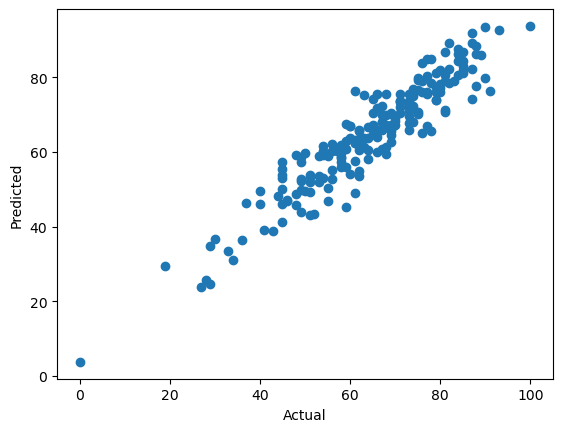

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

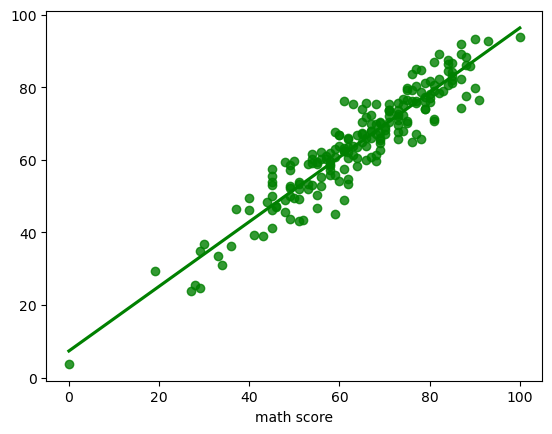

In [ ]:
sns.regplot(x = y_test, y=y_pred, ci = None, color ='green')

__Difference between Actual and Predicted values__

In [ ]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df 

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
